<a href="https://colab.research.google.com/github/me-dibs/intern-project/blob/main/1_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description:

In this notebook we preprocess our dataset "normal_tissue.tsv" available under "Normal Tissue Data" here:
https://v22.proteinatlas.org/about/download

After necessary preprocessing we load it to our Hugging Face dataset repository for ease during finetuning

Direct access to the processed dataset in Hugging Face:
https://huggingface.co/datasets/autumnal05/transformed_normal_tissue_4k

#1. Installing the required packages

In [ ]:
! pip install datasets
! pip install huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from datasets import Dataset

#In case of Llama 2, the following prompt template is used for the chat models

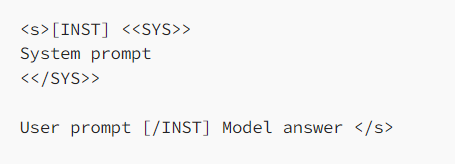

System Prompt (optional) to guide the model


User prompt or Human prompt(required) to give the instruction


Model Answer or Assistant prompt (required)

#So we write a function to convert the data to natural language in the form used by Llama 2 chatbot

In [ ]:
#loading the dataset which is a tsv file
df = pd.read_csv('normal_tissue.tsv', sep='\t')
df = df.head(4000)#using the first 4000 rows

In [ ]:
#Function to transform the dataset into the desired format
def transform_by_tissue(df, gene_name, tissue):
    #Filtering the data for the specific gene and tissue
    filtered_data = df[(df['Gene name'] == gene_name) & (df['Tissue'] == tissue)]

    #Checking if the filtered data is not empty
    if filtered_data.empty:
        return None  # or return a suitable default value

    #Constructing the 'Human' prompt
    human_text = f"What is the expression profile for {gene_name} in the {tissue}?"

    #Constructing the 'Assistant' response based on all matching rows
    assistant_parts = []
    for _, row in filtered_data.iterrows():
        assistant_parts.append(f"The expression level is {row['Level'].lower()} in {row['Cell type']} with reliability of {row['Reliability']}.")

    assistant_text = f"The expression level of gene {gene_name} with Ensembl gene identifier {filtered_data.iloc[0]['Gene']} is as follows: " + " ".join(assistant_parts) + " The reliability is with respect to immunohistochemistry using tissue micro arrays."

    #Returning the formatted conversation
    return f"<s>[INST] {human_text} [/INST] {assistant_text} </s>"


In [ ]:
#Generating dataset using unique gene names and tissues
transformed_texts = []
for gene_name in df['Gene name'].unique():
    for tissue in df[df['Gene name'] == gene_name]['Tissue'].unique():
        transformed_text = transform_by_tissue(df, gene_name, tissue)
        if transformed_text:  #Check if transformed_text is not None
            transformed_texts.append(transformed_text)

In [ ]:
#Savingthe transformed data
pd.DataFrame({'transformed_text': transformed_texts}).to_json('transformed_dataset_4k.json', orient='records', lines=True)

In [ ]:
df = pd.read_json('transformed_dataset_4k.json', lines=True)
df= df.head(2000)#dataset to have only 2000 entries
dataset = Dataset.from_pandas(df)


In [ ]:
#checking the format of our dataset
print(dataset)

Dataset({
    features: ['transformed_text'],
    num_rows: 2000
})


In [ ]:
dataset.push_to_hub("autumnal05/transformed_normal_tissue_2k")#use dataset repository name in Hugging Face

In [ ]:
dataset.push_to_hub("Sukanya123/transformed_normal_tissue_2k")#use dataset repository name in Hugging Face